In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18
from torchvision.models import resnet50
from torchvision.models import resnet34 # Or your specific ResNet model
from PIL import Image
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

c:\Users\LAPZONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pip install lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --------- ------------------------------ 2.9/12.8 MB 18.6 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.8 MB 11.9 MB/s eta 0:00:01
   ------------------ --------------------- 6.0/12.8 MB 9.5 MB/s eta 0:00:01
   -------------------- ------------------- 6.6/12.8 MB 8.2 MB/s eta 0:00:01
   ---------------------- ----------------- 7.1/12.8 MB 6.9 MB/s eta 0:00:01
   ----------------------- ---------------- 7.6/12.8 MB 5.8 MB/s eta 0:00:01
   ------------------------- -------------- 8.1/12.8 MB 5.3 MB/s eta 0:00:01
   --------------------------- ------------ 8.7/12.8 MB 5.0 MB/s eta 0:00:01
   ---------------------------- ----------- 9.2/12.8 MB 4.8 MB/s eta 0:00:01
   ------------------------------- -------- 10.0/12.8 MB 4.6 MB/s eta 0:00:01
   -------------------------------- ------- 10.5/12.8 M

  You can safely remove it manually.


In [2]:
import torch
from torchvision.models import resnet34

model = resnet34(pretrained=False)
try:
    model.load_state_dict(torch.load("C:/Users/LAPZONE/OneDrive/Desktop/MIET/LIME/plant_disease_model.pth", map_location=torch.device('cpu')))
    print("Model loaded successfully as resnet34!")
except RuntimeError as e:
    print(f"Error loading as resnet34: {e}")

from torchvision.models import resnet50

model = resnet50(pretrained=False)
try:
    model.load_state_dict(torch.load("C:/Users/LAPZONE/OneDrive/Desktop/MIET/LIME/plant_disease_model.pth", map_location=torch.device('cpu')))
    print("Model loaded successfully as resnet50!")
except RuntimeError as e:
    print(f"Error loading as resnet50: {e}")

c:\Users\LAPZONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\LAPZONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\LAPZONE\AppData\Local\Temp\ipykernel_5696\2060255883.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a fu

Error loading as resnet34: Error(s) in loading state_dict for ResNet:
	Missing key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer1.2.conv1.weight", "layer1.2.bn1.weight", "layer1.2.bn1.bias", "layer1.2.bn1.running_mean", "layer1.2.bn1.running_var", "layer1.2.conv2.weight", "layer1.2.bn2.weight", "layer1.2.bn2.bias", "layer1.2.bn2.running_mean", "layer1.2.bn2.running_var", "layer2.0.conv1.weight", "layer2.0.bn1.weight", "layer2.0.bn1.

C:\Users\LAPZONE\AppData\Local\Temp\ipykernel_5696\2060255883.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("C:/Users/LAPZONE/OneDriv

In [3]:
# Define image transformations (same as used during training)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
# Load and preprocess the image
image_path = "C:/Users/LAPZONE/OneDrive/Desktop/MIET/LIME/testing.jpeg" #replace with your image path
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

In [5]:
# Define the prediction function for LIME
def predict_fn(images):
    images = torch.from_numpy(images).permute(0, 3, 1, 2).float() # Lime returns in numpy, need to convert to tensor and rearrange dimensions.
    with torch.no_grad():
        outputs = model(images)
        probabilities = torch.nn.functional.softmax(outputs, dim=1).numpy()
    return probabilities

In [6]:
# Initialize the LIME explainer
explainer = lime_image.LimeImageExplainer()

In [7]:
# Generate the explanation
explanation = explainer.explain_instance(
    np.array(image),
    predict_fn,
    top_labels=5,  # Display top 5 predicted classes
    hide_color=0,
    num_samples=1000, # Adjust for better results, higher samples take longer
)

100%|██████████| 1000/1000 [06:49<00:00,  2.44it/s]


In [8]:
# Visualize the explanation
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5, # Adjust number of superpixels highlighted
    hide_rest=True,
)

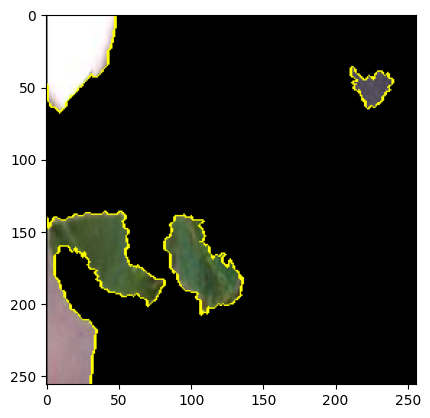

In [9]:
img_boundary = mark_boundaries(temp / 255.0, mask)

plt.imshow(img_boundary)
plt.show()

In [10]:
# Assuming 'explanation' is your ImageExplanation object
print(dir(explanation))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'get_image_and_mask', 'image', 'intercept', 'local_exp', 'local_pred', 'score', 'segments', 'top_labels']


In [11]:
top_label = explanation.top_labels[0]
if hasattr(explanation, 'local_exp') and top_label in explanation.local_exp:
    segment_explanations = explanation.local_exp[top_label]
    print(f"Local explanation for top label {top_label}:")
    for segment_index, weight in segment_explanations:
        print(f"  Segment {segment_index}: weight {weight:.4f}")
else:
    print(f"Could not find local explanation for top label {top_label}.")

Local explanation for top label 115:
  Segment 0: weight 0.0013
  Segment 17: weight -0.0003
  Segment 9: weight -0.0002
  Segment 1: weight -0.0002
  Segment 41: weight 0.0001
  Segment 32: weight -0.0001
  Segment 20: weight -0.0001
  Segment 6: weight 0.0001
  Segment 21: weight -0.0001
  Segment 35: weight -0.0001
  Segment 22: weight -0.0001
  Segment 27: weight 0.0001
  Segment 46: weight -0.0001
  Segment 31: weight 0.0001
  Segment 24: weight 0.0001
  Segment 25: weight -0.0001
  Segment 38: weight 0.0001
  Segment 12: weight 0.0000
  Segment 36: weight 0.0000
  Segment 42: weight -0.0000
  Segment 11: weight 0.0000
  Segment 19: weight 0.0000
  Segment 43: weight -0.0000
  Segment 2: weight -0.0000
  Segment 30: weight -0.0000
  Segment 28: weight -0.0000
  Segment 8: weight 0.0000
  Segment 10: weight 0.0000
  Segment 16: weight -0.0000
  Segment 37: weight 0.0000
  Segment 29: weight -0.0000
  Segment 45: weight -0.0000
  Segment 7: weight 0.0000
  Segment 3: weight -0.0000


In [12]:
#Example of getting the negative parts of the image as well:
temp_all, mask_all = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=False,
    num_features=10,
    hide_rest=False,
)

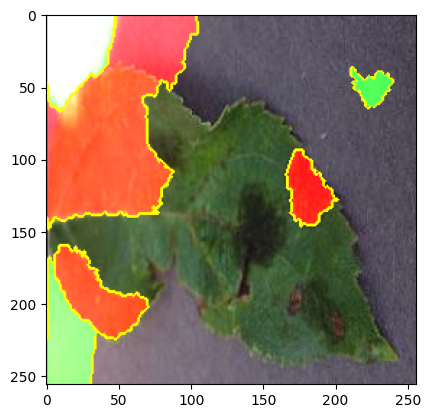

In [13]:
img_boundary_all = mark_boundaries(temp_all / 255.0, mask_all)

plt.imshow(img_boundary_all)
plt.show()